<a href="https://colab.research.google.com/github/Apofice2/Tp/blob/main/bonne_version_de_LowLevelPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implémentation d'un perceptron bas niveau**
# L'objectif est de modéliser un classifieur binaire basé sur un cas d'étude pour autoriser ou non un train d'entrer dans un canton.

# **Partie I**


 > # Codage de la fonction d'activation




In [ ]:
#@title 1 - les données d'apprentissage
import numpy as np
import random as random
import math as m
# Création des données d'observations dans une variable de type array
c1_c2 = np.array([[0,0], [0,1], [1,0], [1,1]])

# Création des données attendues dans une variable de type array
A =np.array([ [1], [1], [0], [0]])


In [ ]:
#@title 2 - les poids

#### Les poids sont dans un premier temps générés de façon aléatoire dans un intervalle.
#### Nous choisirons l'intervalle [-1;1] car la fonction random donne des valeurs comprises dans cet intervalle.

# Initialisation des poids dans l'intervalle [-1;1]
random.seed(1)
borneMin = -1
borneMax = 1

# Calculez les valeurs de poids requis pour initialiser le perceptron
# Nous modéliserons ces valeurs par une fonction affine y = ax+b
# comme étant l'image de notre valeur aléatoire
# a représente l'amplitude de notre intervalle
# b représente la borne minimale de notre intervalle
w11 =random.random()*(borneMax-borneMin)+borneMin
w21 =random.random()*(borneMax-borneMin)+borneMin
#w21 =random.uniform(borneMin, borneMax)*(borneMax-borneMin)+borneMin
print(w11)
print(w21)
# Initialisation du biais qui aura pour valeur 1
# et de son poids qui aura pour valeur nulle
biais = 1
wb =0


-0.7312715117751976
0.6948674738744653


In [ ]:
#@title 3 - les hyperparamètres

#### Les hyperparamètres décrivent des éléments importants
#### dans la configuration du perceptron en vue de son apprentissage

# Taux d'apprentissage
txApprentissage = 0.1

# Nombre d'epochs
epochs = 300

In [ ]:
#@title 4 - les fonctions utiles

#### Pour mettre en oeuvre le perceptron, nous aurons besoin
#### d'un certain nombre de fonctions comme celles d'activation,
#### de calcul pour la mise à jour des poids, d'erreurs, etc.

# Ecrire la fonction de la somme pondérée qui servira à préactiver le neurone
def somme_ponderee(X1,W11,X2,W21,B,WB):
   return (X1*W11)+(X2*W21)+(B*WB)

# Ecrire la fonction d'activation sigmoïde
def fonction_activation_sigmoide(valeur_somme_ponderee):
   return 1/(1 + np.exp(-valeur_somme_ponderee))

# Ecrire la fonction d'activation relu
def fonction_activation_relu(valeur_somme_ponderee):
   return max(0.0, valeur_somme_ponderee)

# Ecrire la fonction de calcul d'erreur linéaire
def erreur_lineaire(valeur_attendue, valeur_predite):
   return (valeur_predite - valeur_attendue)

# Ecrire la fonction de calcul du gradient
def calcul_gradient(valeur_entree,prediction,erreur):
   return  2*erreur*prediction*(1-prediction)*valeur_entree

# Ecrire la fonction d'optimisation pour ajuster les valeurs des poids
def calcul_valeur_ajustement(valeur_gradient, taux_apprentissage):
   return valeur_gradient*taux_apprentissage

# Ecrire la fonction de mise à jour des poids
def calcul_nouveau_poids (valeur_poids, valeur_ajustement):
   return valeur_poids - valeur_ajustement

# Ecrire la fonction de calcul d'erreur entre la prédiction et le résultat attendu
def calcul_MSE(predictions_realisees, predictions_attendues):
   #sum(iterable_object, start_value)
   i=0
   somme=0
   for i in range(len(predictions_realisees)):
     somme += erreur_lineaire(predictions_attendues[i][0],predictions_realisees[i])**2

   return somme/len(predictions_realisees)


In [ ]:
wb

0

In [ ]:
#@title 5 - l'apprentissage

#### Pour réaliser cet apprentissage, vous allez devoir effectuer plusieurs
#### époques pour mettre à jour et optimiser les poids du perceptron.
#### Vous pouvez pour cela utiliser les fonctions que vous avez définies
#### dans la cellule précédente.

# Préparation d'une liste pour stocker les données de la fonction de perte
# quadratique MSE tout au long de l'apprentissage
Graphique_MSE=[]

# Entrainement sur plusieurs époques
for epoch in range(0,epochs):
   print("EPOCH ("+str(epoch)+"/"+str(epochs)+")")

   predictions_realisees_durant_epoch = []
   predictions_attendues = A
   numObservation = 0
   for observation in c1_c2:

       # Chargement de la couche d'entrée

       x1 =observation[0]
       x2 =observation[1]
       print("x1 ", x1)
       print("x2 ", x2)
       # Valeur de prédiction attendue
       ya =A[numObservation][0]
       print("ya ", ya)

       # Etape 1 : Calcul de la somme pondérée
       Sp =somme_ponderee(x1,w11,x2,w21,biais,wb)
       print("Sp ", Sp)


       # Etape 2 : Application de la fonction d'activation (sigmoïde, puis Relu)
       yp =fonction_activation_sigmoide(Sp)
       print("yp ",yp)

       # Etape 3 : Calcul de l'erreur
       err = yp-ya


       # Mise à jour du poids 1
       # Calcul du gradient de la valeur d'ajustement et du nouveau poids
       g1 =calcul_gradient(x1,yp,err)
       va1 =calcul_valeur_ajustement(g1, txApprentissage)
       w11 =calcul_nouveau_poids (w11, va1)

       # Mise à jour du poids 2
       g2 =calcul_gradient(x2,yp,err)
       va2 =calcul_valeur_ajustement(g2, txApprentissage)
       w21 =calcul_nouveau_poids (w21, va2)

       # Mise à jour du poids du biais
       gb =calcul_gradient(biais,yp,err)
       vab =calcul_valeur_ajustement(gb, txApprentissage)
       wb =calcul_nouveau_poids (wb,vab)

       print("     EPOCH (" + str(epoch) + "/" + str(epochs) + ") - Observation: " + str(numObservation+1) + "/" +
       str(len(c1_c2)))

       # Stockage de la prédiction réalisée:
       predictions_realisees_durant_epoch.append(yp)


       # Passage à l'observation suivante
       numObservation = numObservation+1

   # Calcul de la fonction d'erreur quadratique MSE
   MSE =calcul_MSE(predictions_realisees_durant_epoch, A)
   print(MSE)
   Graphique_MSE.append(MSE)
   print("MSE : "+str(MSE))


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Sp  -1.3553602419067048
yp  0.20499541939894228
     EPOCH (114/300) - Observation: 4/4
0.04208396308251639
MSE : 0.04208396308251639
EPOCH (115/300)
x1  0
x2  0
ya  1
Sp  1.0160226757698159
yp  0.7341971412298808
     EPOCH (115/300) - Observation: 1/4
x1  0
x2  1
ya  1
Sp  1.4739284006689175
yp  0.8136537493951422
     EPOCH (115/300) - Observation: 2/4
x1  1
x2  0
ya  0
Sp  -1.8069115465795413
yp  0.1410118077021565
     EPOCH (115/300) - Observation: 3/4
x1  1
x2  1
ya  0
Sp  -1.3605615463190577
yp  0.2041490514516424
     EPOCH (115/300) - Observation: 4/4
0.04173431249122292
MSE : 0.04173431249122292
EPOCH (116/300)
x1  0
x2  0
ya  1
Sp  1.021998074085125
yp  0.735361617306204
     EPOCH (116/300) - Observation: 1/4
x1  0
x2  1
ya  1
Sp  1.4788465121028729
yp  0.8143982899525151
     EPOCH (116/300) - Observation: 2/4
x1  1
x2  0
ya  0
Sp  -1.811100264666457
yp  0.1405052013699386
     EPOCH (116/300) -

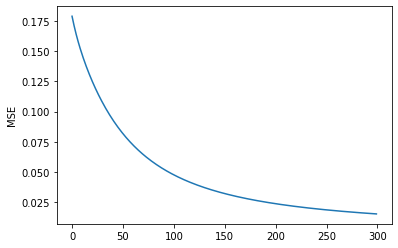

In [ ]:
#@title 6 - monitoring

#### Les données qui ont été stockées pendant l'apprentissage sur la fonction
#### de perte vont être affichées pour être analysées

import matplotlib.pyplot as plt
plt.plot(Graphique_MSE)
plt.ylabel('MSE')
plt.show()

# Recommencer l'apprentissage en modifiant largement l'hyper paramètre epoch
# et monitorer les résultats pour comparer

In [ ]:
#@title 7 - la prédiction

#### Vérification du bon comportement du perceptron

# Affichage des poids obtenus à la fin de l'apprentissage
print ("Poids finaux: " )
print ("W11 = "+str(w11))
print ("W21 = "+str(w21))
print ("Wb = "+str(wb))

# Chargement des données d'entrée pour une observation donnée
x1 = 0
x2 = 1

# Etape 1 : Calcul de la somme pondérée
som=somme_ponderee(x1,w11,x2,w21,biais,wb)

# Etape 2 : Application de la fonction d'activation
valeur_predite=fonction_activation_sigmoide(som)
print("Prédiction du [" + str(x1) + "," + str(x2) + "]")
print("Prédiction = " + str(valeur_predite))

# Constatez le résultat obtenu et recommencez avec une nouvelle prédiction


Poids finaux: 
W11 = -4.008288580245411
W21 = 0.3451081157917329
Wb = 1.6909085963266368
Prédiction du [0,1]
Prédiction = 0.8845270418426775
